In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid (for learning)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Perceptron class with visualization
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.lr = learning_rate

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        output = sigmoid(summation)
        return output

    def train_with_visualization(self, training_inputs, labels, epochs=1000):
        plt.figure(figsize=(10, 7))

        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.lr * error * inputs
                self.bias += self.lr * error

            # Plot every 100 epochs
            if epoch % 100 == 0:
                x = np.linspace(-1, 2, 10)
                if self.weights[1] != 0:
                    y = -(self.weights[0]/self.weights[1])*x - (self.bias/self.weights[1])
                    plt.plot(x, y, label=f'Epoch {epoch}')



        plt.scatter(training_inputs[:,0], training_inputs[:,1], c=labels, cmap='bwr', edgecolors='k')
        plt.title('Decision Boundary Evolution')
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.legend()
        plt.grid(True)
        plt.savefig("decision_boundary.png")
        plt.show()


In [6]:
# Create dataset for NAND function
NAND_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
NAND_outputs = np.array([1,1,1,0])


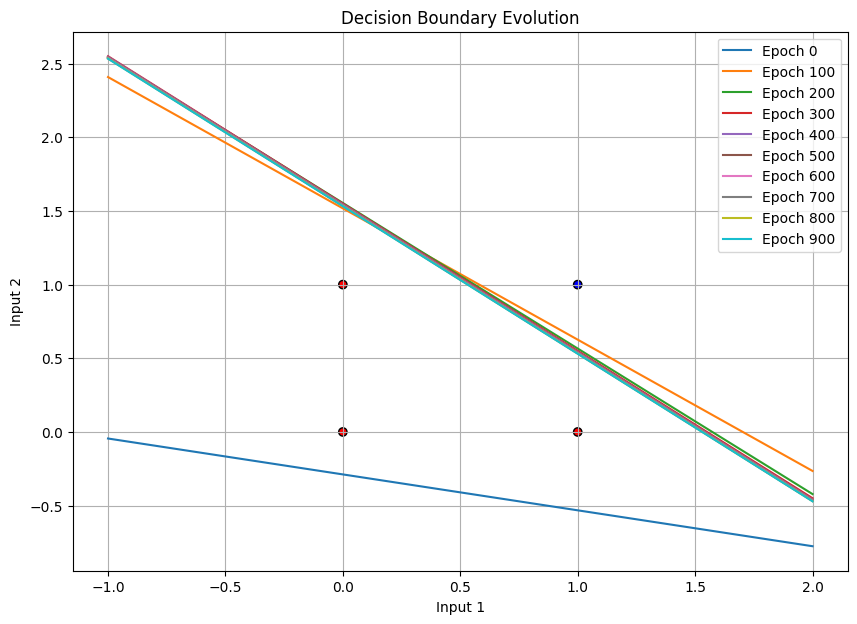

In [7]:
# Create a perceptron and train with visualization
nand_perceptron = Perceptron(input_size=2)
nand_perceptron.train_with_visualization(NAND_inputs, NAND_outputs)
